In [37]:
#importing libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from summarytools import dfSummary
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from scipy import stats
import scipy.stats as stats
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#readind the data 
titanic = sns.load_dataset("titanic")
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
dfSummary(titanic, is_collapsible=False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,survived[int64],Mean (sd) : 0.4 (0.5)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 1.0 (0.8),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAYBJREFUeJzt3UFqwkAYhuGZIqKbBBE8jIfoYXsIbyNlXFQpaLrrplBjVNoPnmc985PFS0IWmdRhGAr8dy9/fQEwxuzaglrrspQynzj/cxiG48S98O3XUGuty/V6/dp13WrK8MPh8F5rfRMr97p2R513XbfabrfHvu9PtwxurS12u91qv9/PSylC5S5XH/2llNL3/Wmz2XxMmL+csAd+8DJFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESoRRX6HCGM88rESoPMSzDysRKo/y1MNKhMpDPeuwEi9TRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEUb9vqe1trh1cGttcT6fZ6WUrtZ684URp7tcLrOprVxb8wX9Y059YHhjbwAAAABJRU5ErkJggg=="">",0(0.0%)
2,pclass[int64],Mean (sd) : 2.3 (0.8)min < med < max:1.0 < 3.0 < 3.0IQR (CV) : 1.0 (2.8),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAZJJREFUeJzt3VFqIkEYhdGqQURfuhHBxbiIWewswt3IUD5MwoD2rCCxNV1kbnLOa1tSNh9SCvrXaZoK/O9+fPYGYI7VZ2+Ar6PWui2lrJ9c/neappe3LgqVRdRat/v9/ucwDLtn1l8ul9+11l9vxSpUlrIehmF3PB5fxnF8fWRha21zOp125/N5XUoRKv2N4/h6OBz+PLF0+95FH6aIIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUItz9a/Seky5grndD7T3pAua6947addIFzDVrKkqvSRcwl/E9HTjXL0+oC3Ou70Ooy3Ou70ConTjXL8sX/kQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmPUr1Nba5tEnbq1trtfrqpQy1Fof3liw4Xa7rb7hPfvQ6773mH+C3HcCikewqgAAAABJRU5ErkJggg=="">",0(0.0%)
3,sex[object],1. male2. female,577 (64.8%)314 (35.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATlJREFUeJzt28Fpw0AURdE3QZhko0EIVIyKSLEpQt0IoVnExpvJwpAO/MbzfU8F3/hibKOXaq0CHJKkL0mX1ofg373Wem19xDMM8zx/j+M4tT4ED6WUI6X0EzG4YRzHaV3Xa8751vqYd3ee5+e2bdO+7xdJ8WKTpJzzbVmW39bHQNLja01IH60PwPsgNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBZpAeD+21PgTx34ehlHJs2zYp8EN7PSmlHJLure94BgYvryfs4CUx5YNL9E+2sJ8SPQo95Ys8i+tR2Clf9Flcj6JP+fiF/UL4Uxc2xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22ISd8kV8Tb0LPeWLPIvrEYMX2PwBCltq38NzG/wAAAAASUVORK5CYII="">",0(0.0%)
4,age[float64],Mean (sd) : 29.7 (14.5)min < med < max:0.4 < 28.0 < 80.0IQR (CV) : 17.9 (2.0),88 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAoNJREFUeJzt3UGO2jAUgOHnZkABpESICnZcoFIXLDlED9sjFIkTcAN2SFEUREpECOmm001nGOIkxc/9v72FF78gMbZs6roWwHWfnj0B4BEvz57APcaYkYgMLYdf6ro+dzkfPI+zoRpjRrPZ7FsURVOb8cfjMTXGfCdWPzgbqogMoyiartfrcxzHRZOBWZaF2+12miTJUEQI1QMuhyoiInEcF/P5/GfTcVVVRSISGWNsP5pHB4c4H6qNPM8HZVl+XS6XQRAEjb6NX/Ho4BYvQ71cLi9hGI5Xq1WxWCzSpuN5dHCPl6G+mkwmVo8Nv406nQxaYR0VKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVvN443UZVVQOxP3PFeauOEeob2p654rxV9wj1DW3OXHHeqh+EekeLM1ect+oYL1NQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSqwza8HnA7oHqF2jNMB/SDUjnE6oB+E2hNOB3SLlymoQKhQ4cOffq4ihwvuhspV5HDFR9+oXEUOJzz01v+kq8ij2+02sBmoWcs/C0Q8fdzqbXmq7cJ3WZZhVVVfiqL4ISK2F++qwvXt7+st1LZXke/3++lutxtfr9egj/m5iOvb39f7gr/twneapv/twjfXt/+NdVSoQKhQgVChAqFCBXZPecbXTduE6hGfN20Tqkd83rRNqB7ycdM2L1NQgVChAj/9+MPlnVuEChFxf+cWoUJEutm5tdls5kmSfDbGHG2mcC/wh0LNsixs+qmn0ykUEcnzPDwcDuN/OV7rZ7swb1vn87nXNdxfmjKyuaZj420AAAAASUVORK5CYII="">",177(19.9%)
5,sibsp[int64],Mean (sd) : 0.5 (1.1)min < med < max:0.0 < 0.0 < 8.0IQR (CV) : 1.0 (0.5),7 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb2

From the above we can see the column "Age" and "embarked" , "deck", "embarked_town" have missing values that needs to be filled 

We can also see that there 107 duplicates that needs to be dropped

In [5]:
#Dropping duplicates
titanic.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


We now have 784 rows without the duplicates , the missing values will be filled soon

In [30]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The describe() gives an understanding of the central tendencies of the numeric data.

Above we can see that 38% out of the training-set survived the Titanic
We can also see that the passenger age range from 0.4 to 80 years old.

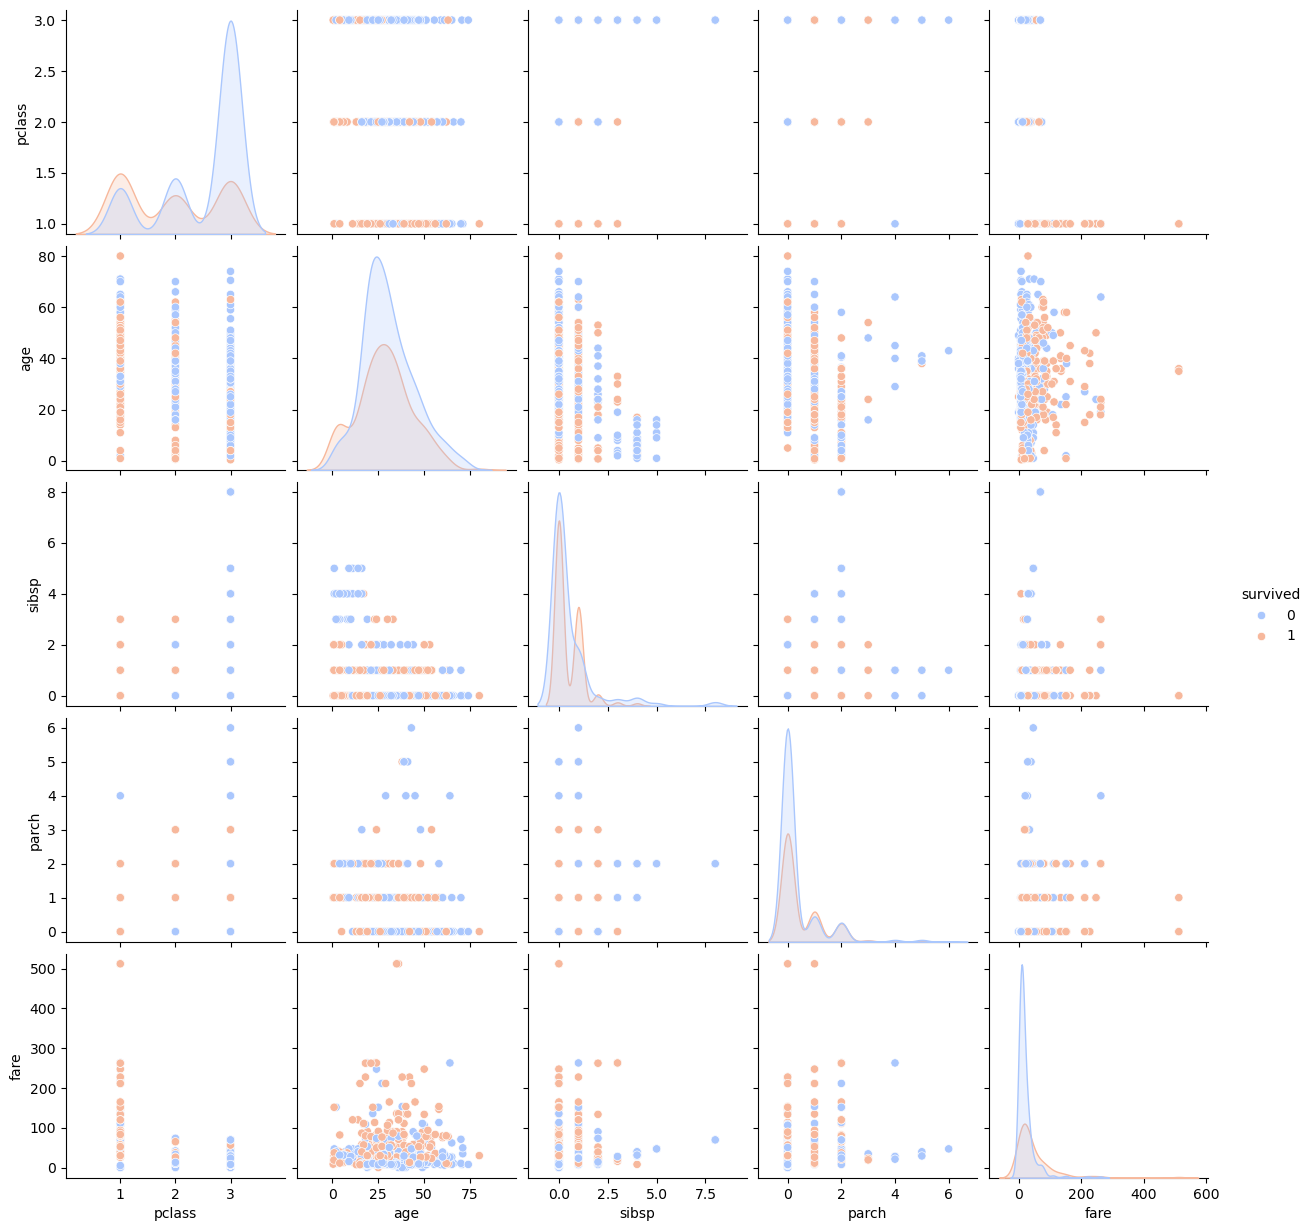

In [24]:
#Now lets do an eploratory data analysis/ distribution of the features

# Selecting only numerical features
num_features = ["survived", "pclass", "age", "sibsp", "parch", "fare"]

# Pairplot to show pairwise scatter plots
sns.pairplot(titanic[num_features], hue="survived", palette="coolwarm", diag_kind="kde")

# Show the plot
plt.show()

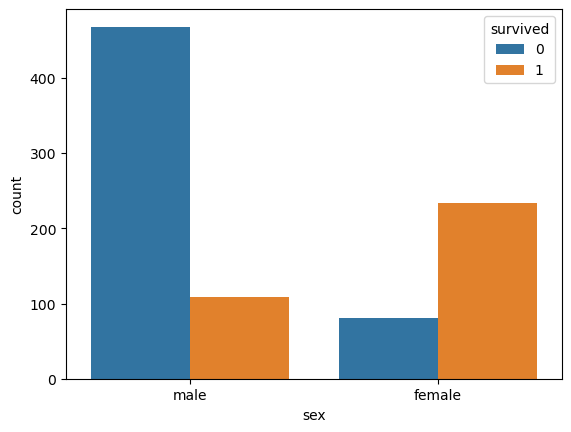

In [10]:
#Lets look at the distribution for  only sex
# Countplot 
sns.countplot(x="sex", hue="survived", data=titanic) 
plt.show()

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

left or right skewed or normally distribution

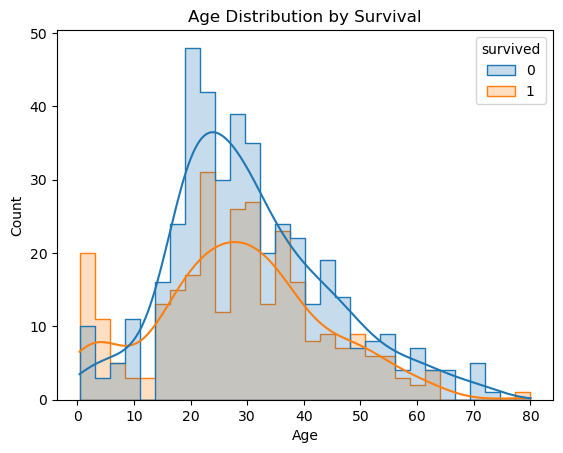

In [13]:
#Plotting the age distribution for both survivors and non-survivors
# Plot age distribution by survival status
sns.histplot(data=titanic, x="age", hue="survived", bins=30, kde=True, element="step")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival")
plt.show()

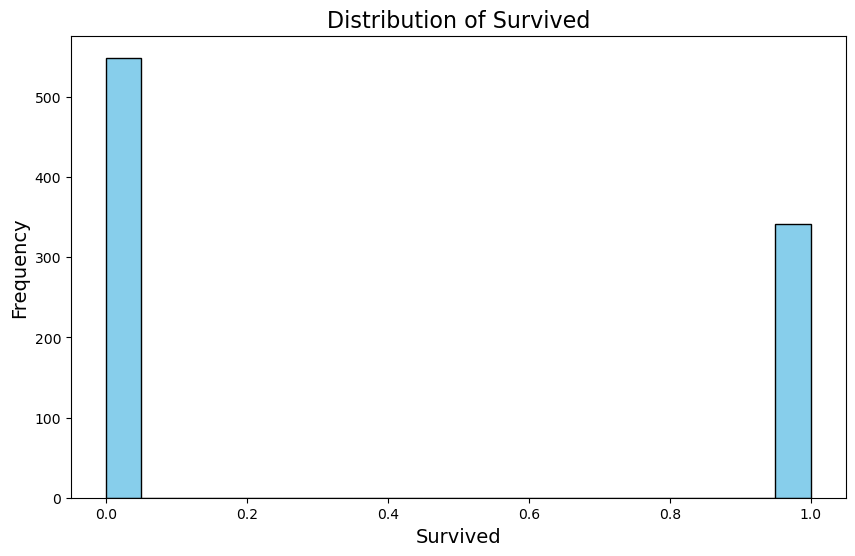

In [14]:
#Lets check for the distribution of our target 
plt.figure(figsize=(10, 6))  # Adjusts the figure size
plt.hist(titanic['survived'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Survived', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

We can see that those who did not survive are more than those we survived 

### Testing for Normality 
Lets see if our dataset itself follows a normal distribution

Hypothesis Testing

Ho: The data is normally distributed

H1: The data is not normally distributed

Null Hypothesis ( 𝐻 0): The data is normally distributed.

Alternative Hypothesis ( 𝐻 1): The data is not normally distributed.

If p-value > 0.05 → Fail to reject 𝐻 0

​→ Data is likely normal.

If p-value ≤ 0.05 → Reject 𝐻 0

→ Data is not normal.

In [19]:
#Using Shapiro Wilk test(data less than 2000) to test for normality 
for column in titanic.select_dtypes(include=['number']).columns:
    shapiro_test = stats.shapiro(titanic[column].dropna())  # Drop NaNs to avoid errors
    print(f'Shapiro-Wilk Test for {column}:')
    print(f'Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}\n')

Shapiro-Wilk Test for survived:
Statistic = 0.6167, p-value = 0.0000

Shapiro-Wilk Test for pclass:
Statistic = 0.7183, p-value = 0.0000

Shapiro-Wilk Test for age:
Statistic = 0.9815, p-value = 0.0000

Shapiro-Wilk Test for sibsp:
Statistic = 0.5130, p-value = 0.0000

Shapiro-Wilk Test for parch:
Statistic = 0.5328, p-value = 0.0000

Shapiro-Wilk Test for fare:
Statistic = 0.5219, p-value = 0.0000



All p-values are 0.0000 (< 0.05) so none of the features follow a normal distribution.

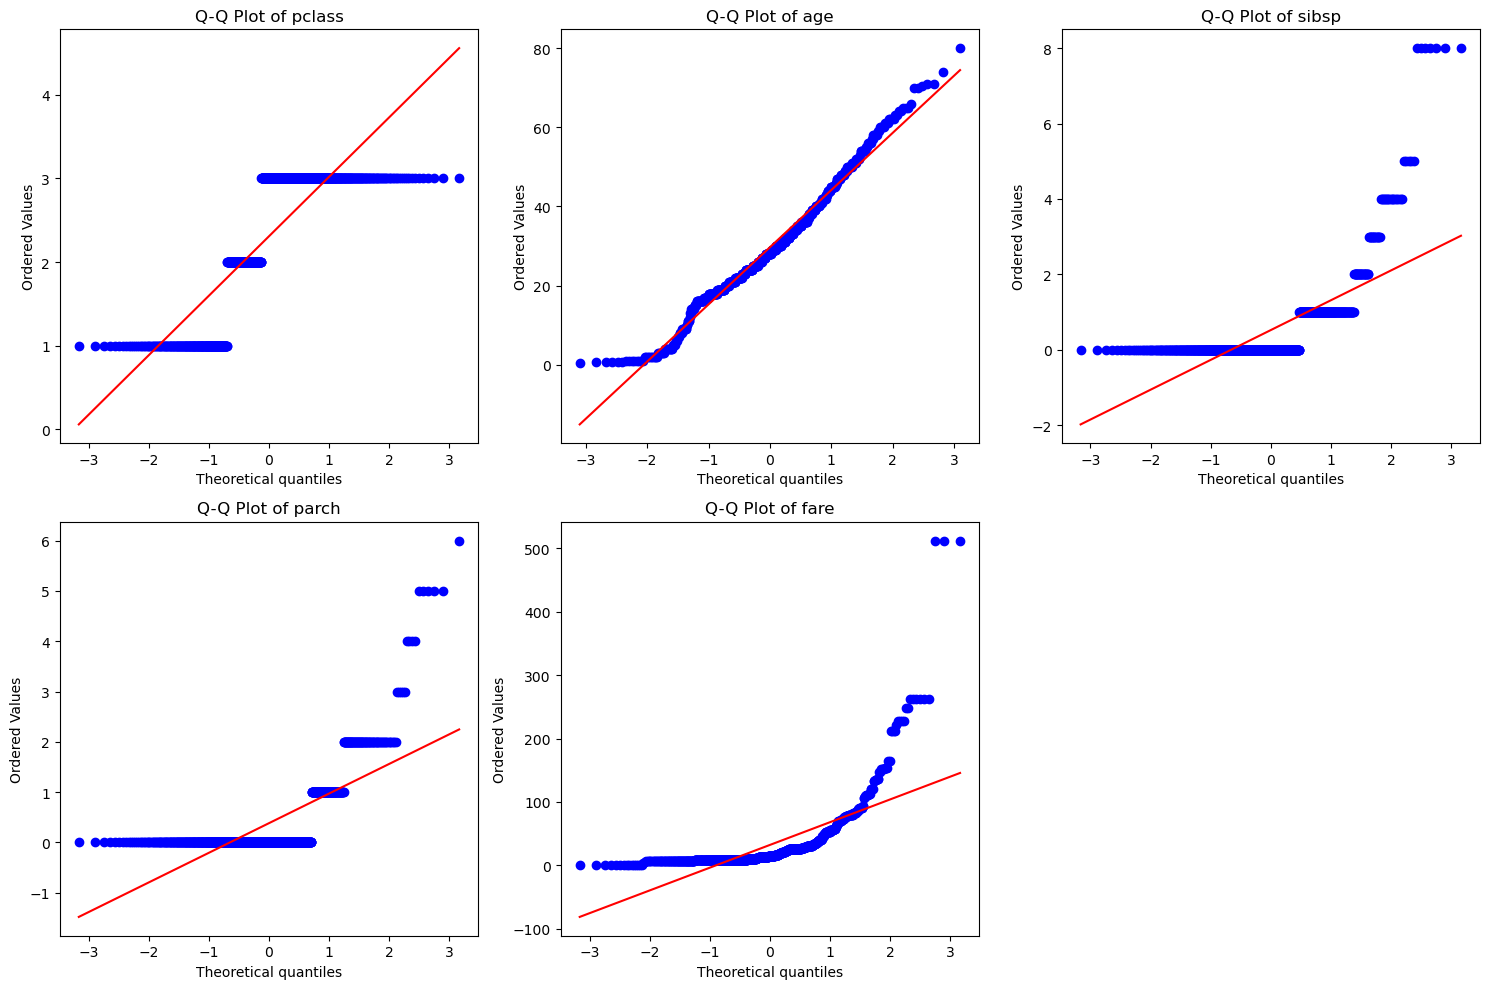

In [23]:
# Using Q-Q Plot to to confirm the distributions.
# Features to analyze
features = ["pclass", "age", "sibsp", "parch", "fare"]

# Create subplots (2 rows, 3 columns to fit all)
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Adjust for 5 plots (2 rows, 3 columns)
    
    # Ensure numeric conversion & handle NaNs
    data = pd.to_numeric(titanic[feature], errors='coerce').dropna()
    
    # Generate Q-Q plot
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')

plt.tight_layout()
plt.show()

1. Q-Q Plot for pclass
The plot shows three distinct horizontal bands, which suggests that pclass is categorical (values 1, 2, 3).
It does not follow a normal distribution.

2. Q-Q Plot for age
The points mostly follow the red line but deviate at the extremes (both lower and upper ends).
This suggests that age is approximately normal but may have some skewness or outliers.

3. Q-Q Plot for sibsp (Number of Siblings/Spouses)
The plot shows discrete values and strong deviations from the normal line.
This confirms that sibsp is not normally distributed; it is count data (integer values like 0, 1, 2, etc.).
The strong deviations at the upper end suggest possible outliers.

4. Q-Q Plot for parch (Number of Parents/Children)
Similar to sibsp, this plot shows discrete values and deviates significantly from normality.
The data is count-based and skewed, making it non-normal.

5. Q-Q Plot for fare
The points deviate significantly from the red line, especially in the upper tail.
This suggests that fare has a right-skewed distribution, meaning most passengers paid lower fares, but a few paid significantly higher fares (outliers).

### Calculating the correlation between the features and the target (survived)

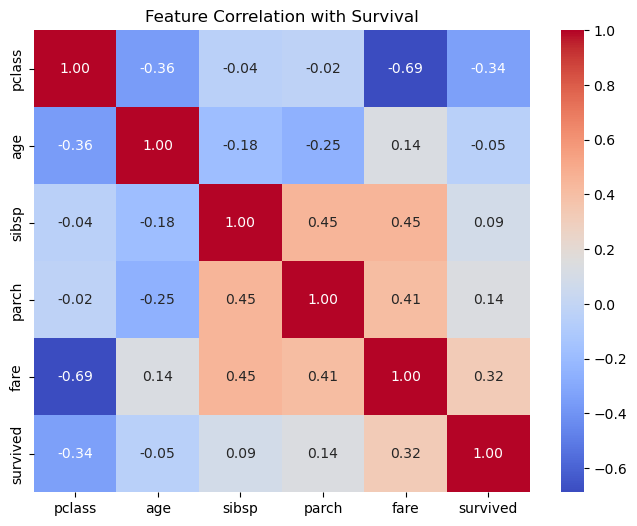

In [25]:
#since the numerical features are non normal we will use Spearman correlation to find correlation

# Selecting numeric features
numeric_features = ["pclass", "age", "sibsp", "parch", "fare"]
correlation_matrix = titanic[numeric_features + ["survived"]].corr(method="spearman")  

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Survival")
plt.show()

In [28]:
# Selecting numeric features
numeric_features = ["pclass", "age", "sibsp", "parch", "fare"]

# Loop through each feature and calculate Spearman correlation with "survived"
for feature in numeric_features:
    corr, p_value = spearmanr(titanic[feature], titanic["survived"], nan_policy="omit")
    
    # Print results
    print(f"Feature: {feature}")
    print(f"Spearman correlation: {corr:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    # Interpretation
    if p_value < 0.05:
        print("➡️ There is a statistically significant relationship between this feature and survival.")
    else:
        print("❌ No significant relationship between this feature and survival.")
    
    print("-" * 50)

Feature: pclass
Spearman correlation: -0.34
P-value: 0.0000
➡️ There is a statistically significant relationship between this feature and survival.
--------------------------------------------------
Feature: age
Spearman correlation: -0.05
P-value: 0.1606
❌ No significant relationship between this feature and survival.
--------------------------------------------------
Feature: sibsp
Spearman correlation: 0.09
P-value: 0.0079
➡️ There is a statistically significant relationship between this feature and survival.
--------------------------------------------------
Feature: parch
Spearman correlation: 0.14
P-value: 0.0000
➡️ There is a statistically significant relationship between this feature and survival.
--------------------------------------------------
Feature: fare
Spearman correlation: 0.32
P-value: 0.0000
➡️ There is a statistically significant relationship between this feature and survival.
--------------------------------------------------


1. ANOVA (For Correlation Between Categorical & Numerical Features)
ANOVA (Analysis of Variance) helps check if "class" significantly affects "fare" or "survived".

In [39]:
# ANOVA test: Does "class" significantly impact "fare"?
anova_fare = stats.f_oneway(titanic[titanic['class'] == 'First']['fare'], 
                            titanic[titanic['class'] == 'Second']['fare'], 
                            titanic[titanic['class'] == 'Third']['fare'])

# ANOVA test: Does "class" significantly impact "survived"?
anova_survived = stats.f_oneway(titanic[titanic['class'] == 'First']['survived'], 
                                titanic[titanic['class'] == 'Second']['survived'], 
                                titanic[titanic['class'] == 'Third']['survived'])

print("ANOVA p-value (Fare ~ Class):", anova_fare.pvalue)
print("ANOVA p-value (Survived ~ Class):", anova_survived.pvalue)

ANOVA p-value (Fare ~ Class): 1.0313763209141171e-84
ANOVA p-value (Survived ~ Class): 2.1832474151179777e-24


These p-values are extremely small (<< 0.05), which means:

✅ "Class" significantly impacts "Fare" → This makes sense since first-class passengers paid higher fares than third-class passengers.

✅ "Class" significantly impacts "Survival" → This suggests that survival chances varied by class, likely because first-class passengers had better access to lifeboats.

ANOVA test to check if embarked and embark_town are redundant.

In [ ]:
# Convert categorical variables to numeric for ANOVA
titanic["embarked"] = df["embarked"].astype("category").cat.codes
df["embark_town"] = df["embark_town"].astype("category").cat.codes

# ANOVA test
anova_embarked_embark_town = stats.f_oneway(df["embarked"], df["embark_town"])
print("ANOVA p-value (Embarked ~ Embark_Town):", anova_embarked_embark_town.pvalue)

In [ ]:
#Do a bar plot , look for the distribution and correlation
#Do a percentage distribution of your target and other features 
#Do a full EDA
#do a distribution of all your features
#do a correlation matrix to reduce the dimensionality
#Dont just drop the features like that , know your reasons
#Read the description of the data

Feature Egineering

Combining SibSp (siblings/spouses aboard) and Parch (parents/children aboard) into a single feature called "relatives" will give a better representation of a passenger’s family size.

relatives = sibsp + parch → Total number of family members

In [31]:
# Create new feature 'relatives' (Total family members onboard)
titanic["relatives"] = titanic["sibsp"] + titanic["parch"]
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,relatives
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


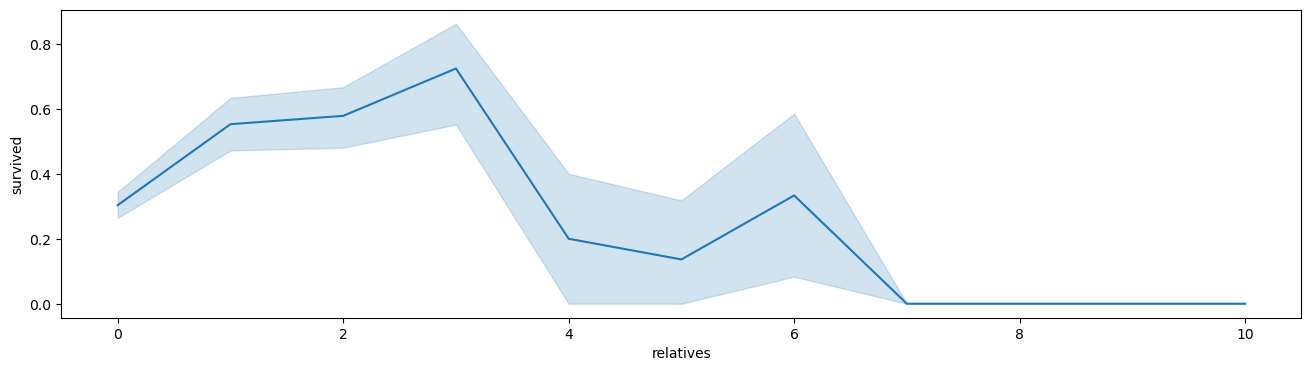

In [34]:
plt.subplots(figsize = (16, 4))
ax = sns.lineplot(x = 'relatives', y = 'survived', data = titanic)

People with 1 to 3 relatives had a higher survival rate (~50-80%)

This suggests that traveling with a small family increased the chances of survival.
Families might have helped each other find lifeboats.
People with 4 or more relatives had a lower survival rate

The survival rate dropped sharply after 3 relatives.
Large families may have struggled to stay together during the evacuation.
People with 0 relatives (alone travelers) had a lower survival rate (~30%)

This suggests that being alone reduced the likelihood of getting help.

### Dropping some columns 

Since "relative" captures the relationship better, I will  drop "sibsp" and "parch" to avoid redundancy

I will also drop "pclass" because from the heatmap above because there is a negative stromg correlation(-0.69) between "fares" and "pclass"meaning that passengers in higher pclasses (pclass=1) paid significantly higher fares than those in lower pclasses (class=3).
This confirms that pclass is a strong predictor of fare, and we could potentially drop one of them to avoid multicollinearity in a predictive model.

I will also drop "

In [40]:
#dropping some columns 
titanic.drop(columns=["sibsp", "parch", "pclass"], inplace=True, errors='ignore')

In [41]:
print(titanic.columns)

Index(['survived', 'sex', 'age', 'fare', 'embarked', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'relatives'],
      dtype='object')


In [ ]:
# Define features (X) and target variable (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [ ]:
X

In [ ]:
y

In [ ]:
#Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preprocessing the data 

In [ ]:
# Identify all numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing for numerical data (Imputation + Scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values #look at the distribution look at outflier
    ('scaler', StandardScaler())  # Scale numerical features
])

# Define preprocessing for categorical data (Imputation + Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical values to numeric
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Process all num cols
        ('cat', categorical_transformer, categorical_cols)  # Process all cat cols
    ]
)


Apply Pipeline on Training & Test Data

In [ ]:
# Fit and transform training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert to DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

# Print shape to verify transformation
print(X_train_transformed.shape)
print(X_test_transformed.shape)

In [ ]:
X_train_transformed

In [ ]:
X_test_transformed

Using classical model , logistic regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
#training the model
log_reg.fit(X_train_transformed,y_train.ravel())

#make predictions
y_pred = log_reg.predict(X_test_transformed)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Let us compare our classical model to ANN model

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_transformed.shape[1],)),
        layers.Dropout(0.3),  # Dropout to prevent overfitting
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

model = build_model()
#data.copy

Train the Model with Early Stopping

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_transformed, y_train, 
                    validation_data=(X_test_transformed, y_test),
                    epochs=100, batch_size=32, 
                    callbacks=[early_stopping])

Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test_transformed, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Accuracy (82.58%): This suggests the model correctly predicted around 83% of the test data, which is a decent result depending on the complexity of the problem.

In [ ]:
Include random forest 
Define your models with a dictionary and loop through all three and plot them